### Naloga 1 *(15 T)*

V dataframe preberite vse štiri datoteke s podatki: `gladiator_personal_data.csv`, `gladiator_statistics.csv`, `gladiator_skills.xlsx` in `gladiator_status.txt`. Vse prebrane podatke iz datotek nato združite v en dataframe, glede na ime gladiatorja. Indeks stolpec naj bo poimenovan *GLADIATOR*.

- Na **dva**(!) različna načina izpišite **prve 3 vrstice** tega združenega datafram-a.
- izpišite koliko **stolpcev in vrstic** je v združenem datafram-u.
- Izpišite **podatkovne tipe** za stolpce od drugega do (vključno) petega.
- Izpišite koliko je posameznih **unikatnih vrednosti** v stolpcu Equipment Quality.
- Izpišite vse podatke za gladiatorja "Nero Menenius".
- Zapišite število gladiatorjev, ki so doživeli 4 ali 5 porazov (Losses). Rezultat poizvedbe mora biti številka!

In [26]:
import pandas as pd 
personal=pd.read_csv("gladiator_personal_data.csv",index_col=0,sep="	")
statistics=pd.read_csv("gladiator_statistics.csv",index_col=0,sep=";",decimal=",")
skills=pd.read_excel("gladiator_skills.xlsx",index_col=0,sheet_name=0)
status=pd.read_csv("gladiator_status.txt",index_col=0,sep=" ")

data=pd.merge(status,skills,left_index=True,right_index=True)
print(data)
data=pd.merge(data,statistics,left_index=True,right_index=True)
print(data)
data=pd.merge(data,personal,left_index=True,right_index=True)
print(data)

                 Survived Equipment Quality Injury History Tactical Knowledge  \
Name                                                                            
Acilius Acilius        No          Standard           High       Intermediate   
Acilius Agrippa       Yes          Superior            Low           Advanced   
Acilius Albinius      Yes          Superior           High           Advanced   
Acilius Albinius      Yes          Standard            Low             Expert   
Acilius Albinius      Yes          Superior           High           Advanced   
...                   ...               ...            ...                ...   
Zeno Vitus             No             Basic            Low             Expert   
Zeno Zeno             Yes             Basic            Low       Intermediate   
Zeno Zeno             Yes          Superior            Low             Expert   
Zeno Zeno             Yes             Basic            Low       Intermediate   
Zeno Zeno             Yes   

In [27]:
data.index.name="GLADIATOR"
print(data)

                 Survived Equipment Quality Injury History Tactical Knowledge  \
GLADIATOR                                                                       
Acilius Acilius        No          Standard           High       Intermediate   
Acilius Agrippa       Yes          Superior            Low           Advanced   
Acilius Albinius      Yes          Superior           High           Advanced   
Acilius Albinius      Yes          Superior           High           Advanced   
Acilius Albinius      Yes          Superior           High           Advanced   
...                   ...               ...            ...                ...   
Zeno Zeno             Yes             Basic            Low       Intermediate   
Zeno Zeno             Yes          Superior            Low             Expert   
Zeno Zeno             Yes          Superior            Low             Expert   
Zeno Zeno             Yes          Superior            Low             Expert   
Zeno Zeno             Yes   

- Na **dva**(!) različna načina izpišite **prve 3 vrstice** tega združenega datafram-a.
- izpišite koliko **stolpcev in vrstic** je v združenem datafram-u.
- Izpišite **podatkovne tipe** za stolpce od drugega do (vključno) petega.
- Izpišite koliko je posameznih **unikatnih vrednosti** v stolpcu Equipment Quality.
- Izpišite vse podatke za gladiatorja "Nero Menenius".
- Zapišite število gladiatorjev, ki so doživeli 4 ali 5 porazov (Losses). Rezultat poizvedbe mora biti številka!

In [28]:
data.head(3)
data.iloc[0:3]

,Survived,Equipment Quality,Injury History,Tactical Knowledge,Health Status,Personal Motivation,Previous Occupation,Battle Strategy,Crowd Appeal Techniques,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Age,Origin,Height,Weight
GLADIATOR,,,,,,,,,,,,,,,,,,
Acilius Acilius,No,Standard,High,Intermediate,Good,Freedom,Laborer,Balanced,Intimidating,6,4,0.577528,2.404240,10.0,27,Rome,169,78.0
Acilius Agrippa,Yes,Superior,Low,Advanced,Excellent,Vengeance,Entertainer,Balanced,Charismatic,5,1,0.584773,8.185433,6.0,28,Germania,165,85.0
Acilius Albinius,Yes,Superior,High,Advanced,Good,Vengeance,Entertainer,Balanced,Humble,12,5,0.783059,3.676155,17.0,31,Gaul,182,77.0


In [29]:
data.shape

(3524609, 18)

In [30]:
data.iloc[:,1:6].dtypes

Equipment Quality      object
Injury History         object
Tactical Knowledge     object
Health Status          object
Personal Motivation    object
dtype: object

In [31]:
data["Equipment Quality"].nunique()
data["Equipment Quality"].unique()

array(['Standard', 'Superior', 'Basic'], dtype=object)

In [32]:
data.loc[["Nero Menenius"]]

,Survived,Equipment Quality,Injury History,Tactical Knowledge,Health Status,Personal Motivation,Previous Occupation,Battle Strategy,Crowd Appeal Techniques,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Age,Origin,Height,Weight
GLADIATOR,,,,,,,,,,,,,,,,,,
Nero Menenius,No,Superior,High,Basic,Good,Glory,Laborer,Balanced,Intimidating,10,2,0.831285,3.764396,12.0,38,Greece,169,78.0


In [33]:
izbrani_porazi=data[(data["Losses"]==4)|(data["Losses"]==5)].shape[0]
print(izbrani_porazi)

365037


Naloga 2 (20 T)
Izrišite graf, ki bo prikazoval povprečno starost gladiatorjev, ki so umrli, glede na dejavnost s katero so se ukvarjali preden so postali gladiatorji (Previous Occupation).
Izrišite graf, iz katerega bo razvidna mediana ter največje in najmanjše število zmag, ki so jih dosegli gladiatorji.
Izrišite graf raztrosa (s črto), ki bo prikazoval višino gladiatorja glede na poljubno vrednost (izmed stolpcev sami izberite vrednost, ki bo dala smiseln rezultat), ločeno glede na zdravstveno stanje gladiatorja. Za vsako zdravstveno stanje naj bo prikazan ločen podgraf.
V naraščajočem vrstnem redu izpišite povprečno težo gladiatorjev (zaokroženo na dve decimalki) glede na njihovo primarno izbrano bojno strategijo. Upoštevajte samo tiste gladiatorje, ki tekmujejo zaradi tega da bi si zagotovili svobodo ali preživetje (Personal Motivation).
Koliko je takšnih gladatorjev, ki se na agresiven način (Battle Strategy) borijo zaradi maščevanja (Personal Motivation)?

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=data.copy()

dead_gladiators = df[df['Survived'] == 'No']


average_age = dead_gladiators.groupby('Previous Occupation')['Age'].mean()

plt.figure(figsize=(10, 6))
average_age.plot(kind='bar', color='skyblue')
plt.title('Povprečna starost umrlih gladiatorjev glede na prejšnjo dejavnost')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()


NameError: name 'data' is not defined

In [ ]:

wins_stats = df['Wins'].agg(['median', 'min', 'max'])


plt.figure(figsize=(8, 5))
plt.bar(['Mediana', 'Minimum', 'Maksimum'], wins_stats, color='green')
plt.title('Statistike zmag gladiatorjev')
plt.ylabel('Število zmag')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:

import numpy as np


plt.figure(figsize=(12, 7))
for status, group_data in df.groupby('Health Status'):
    plt.scatter(group_data['Height'], group_data['Weight'], label=status, alpha=0.6)

    z = np.polyfit(group_data['Height'], group_data['Weight'], 1)
    p = np.poly1d(z)
    plt.plot(group_data['Height'], p(group_data['Height']), "r--")

plt.title('Višina gladiatorjev glede na težo, razvrščeno po zdravstvenem stanju')
plt.xlabel('Višina (cm)')
plt.ylabel('Teža (kg)')
plt.legend(title='Zdravstveno stanje')
plt.grid(True)
plt.show()


In [ ]:

filtered_df = df[df['Personal Motivation'].isin(['Freedom', 'Survival'])]


average_weight = filtered_df.groupby('Battle Strategy')['Weight'].mean().sort_values()
print(average_weight.round(2))


In [ ]:

vengeful_aggressive = df[(df['Personal Motivation'] == 'Revenge') & (df['Battle Strategy'] == 'Aggressive')]
count_vengeful_aggressive = vengeful_aggressive.shape[0]
print("Število gladiatorjev, ki se agresivno borijo zaradi maščevanja:", count_vengeful_aggressive)


Naloga 3 (5 T)
Izpišite koliko je manjkajočih podatkov v posameznih stolpcih.
Nato manjkajoče podatke iz stolpcev zapolnite s sledečo strategijo:
Weight zapolnite tako, da od višine specifičnega gladiatorja odštejete vrednost 100 (w=h-100),
Mental Resilience in Public Favor zapolnite s povprečno vrednostjo stolpca,
Previous Occupation zapolnite z vrednostjo “Criminal”,
Crowd Appeal Techniques z najpogosteje pojavljeno vrednostjo stolpca,
ostale vrstice z manjkajočimi vrednostmi izbrišite.
Ponovno izpišite koliko je manjkajočih vrednosti za stolpce Weight, Mental Resilience, Public Favor, Previous Occupation in Crowd Appeal Techniques.

In [34]:
data.isna().sum()

Survived                      8
Equipment Quality             0
Injury History                8
Tactical Knowledge            8
Health Status                 8
Personal Motivation           8
Previous Occupation         574
Battle Strategy               8
Crowd Appeal Techniques    2234
Wins                          0
Losses                        0
Public Favor                292
Mental Resilience           252
Battle Experience             8
Age                           0
Origin                        0
Height                        0
Weight                      187
dtype: int64

Nato manjkajoče podatke iz stolpcev zapolnite s sledečo strategijo:
Weight zapolnite tako, da od višine specifičnega gladiatorja odštejete vrednost 100 (w=h-100),
Mental Resilience in Public Favor zapolnite s povprečno vrednostjo stolpca,
Previous Occupation zapolnite z vrednostjo “Criminal”,
Crowd Appeal Techniques z najpogosteje pojavljeno vrednostjo stolpca,
ostale vrstice z manjkajočimi vrednostmi izbrišite.
Ponovno izpišite koliko je manjkajočih vrednosti za stolpce Weight, Mental Resilience, Public Favor, Previous Occupation in Crowd Appeal Techniques.

In [36]:
data["Weight"].fillna(data["Height"]-100,inplace=True)
data["Mental Resilience"].fillna(data["Mental Resilience"].mean(),inplace=True)
data["Public Favor"].fillna(data["Public Favor"].mean(),inplace=True)
data["Previous Occupation"].fillna("Criminal",inplace=True)
data["Crowd Appeal Techniques"].fillna(data["Crowd Appeal Techniques"].mode()[0],inplace=True)
data.dropna(inplace=True)
data.isna().sum()

Survived                   0
Equipment Quality          0
Injury History             0
Tactical Knowledge         0
Health Status              0
Personal Motivation        0
Previous Occupation        0
Battle Strategy            0
Crowd Appeal Techniques    0
Wins                       0
Losses                     0
Public Favor               0
Mental Resilience          0
Battle Experience          0
Age                        0
Origin                     0
Height                     0
Weight                     0
dtype: int64

Naloga 4 (10 T)
Ustvarite dve kopiji datafram-a dfRegresija in dfKlasifikacija:
dfKlasifikacija je dataframe, ki ga boste uporabili za klasifikacijo, in sicer boste napovedovali ali bo določen gladiator preživel boje (Survived).
dfRegresija je dataframe, ki ga boste uporabili za regresijo, in sicer boste napovedovali število zmag gladiatorja (Wins).
Podatke v obeh dataframih ustrezno predprocesirajte(!) - kategorične vrednosti pretvorite z LabelEncoderjem, številske vrednosti pa morajo biti standardizirane.
Izpišite zadnjih 5 vrstic iz vsakega dataframa.

In [76]:
data.dtypes

data=data.drop_duplicates()
print(data)

                 Survived Equipment Quality Injury History Tactical Knowledge  \
GLADIATOR                                                                       
Acilius Acilius        No          Standard           High       Intermediate   
Acilius Agrippa       Yes          Superior            Low           Advanced   
Acilius Albinius      Yes          Superior           High           Advanced   
Acilius Albinius      Yes          Superior           High           Advanced   
Acilius Albinius      Yes          Superior           High           Advanced   
...                   ...               ...            ...                ...   
Zeno Zeno             Yes             Basic            Low       Intermediate   
Zeno Zeno             Yes          Superior            Low             Expert   
Zeno Zeno             Yes          Superior            Low             Expert   
Zeno Zeno             Yes          Superior            Low             Expert   
Zeno Zeno             Yes   

In [78]:
data.isna().sum()

Survived                   0
Equipment Quality          0
Injury History             0
Tactical Knowledge         0
Health Status              0
Personal Motivation        0
Previous Occupation        0
Battle Strategy            0
Crowd Appeal Techniques    0
Wins                       0
Losses                     0
Public Favor               0
Mental Resilience          0
Battle Experience          0
Age                        0
Origin                     0
Height                     0
Weight                     0
dtype: int64

In [77]:
data.dtypes

Survived                    object
Equipment Quality           object
Injury History              object
Tactical Knowledge          object
Health Status               object
Personal Motivation         object
Previous Occupation         object
Battle Strategy             object
Crowd Appeal Techniques     object
Wins                         int64
Losses                       int64
Public Favor               float64
Mental Resilience          float64
Battle Experience          float64
Age                          int64
Origin                      object
Height                       int64
Weight                     float64
dtype: object

In [61]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

dfKlasifikacijja=data.copy()
kat=dfKlasifikacijja.select_dtypes(include=["object","string"]).columns
st=dfKlasifikacijja.select_dtypes(include=["float64","int64"]).columns

label_encoder=LabelEncoder()
for col in kat:

    dfKlasifikacijja[col]=label_encoder.fit_transform(dfKlasifikacijja[col])

scaler=StandardScaler()
dfKlasifikacijja[st]=pd.DataFrame(scaler.fit_transform(dfKlasifikacijja[st]))

In [59]:
print(dfKlasifikacijja.tail(5))

           Survived  Equipment Quality  Injury History  Tactical Knowledge  \
GLADIATOR                                                                    
Zeno Zeno         1                  0               1                   3   
Zeno Zeno         1                  2               1                   2   
Zeno Zeno         1                  2               1                   2   
Zeno Zeno         1                  2               1                   2   
Zeno Zeno         1                  2               1                   2   

           Health Status  Personal Motivation  Previous Occupation  \
GLADIATOR                                                            
Zeno Zeno              0                    0                    0   
Zeno Zeno              2                    1                    2   
Zeno Zeno              2                    1                    2   
Zeno Zeno              2                    1                    2   
Zeno Zeno              2         

In [64]:
dfRegresija=data.copy()

for col in kat:
    dfRegresija[col]=label_encoder.fit_transform(dfRegresija[col])

dfRegresija[st]=pd.DataFrame(scaler.fit_transform(dfRegresija[st]))


In [51]:
print(dfKlasifikacijja.drop_duplicates())

                  Survived  Equipment Quality  Injury History  \
GLADIATOR                                                       
Acilius Acilius          0                  1               0   
Acilius Agrippa          1                  2               1   
Acilius Albinius         1                  2               0   
Acilius Albinius         1                  2               0   
Acilius Albinius         1                  1               1   
...                    ...                ...             ...   
Zeno Valentinian         0                  1               1   
Zeno Valentinian         1                  1               1   
Zeno Varian              1                  0               1   
Zeno Verecundus          1                  2               1   
Zeno Verecundus          0                  2               1   

                  Tactical Knowledge  Health Status  Personal Motivation  \
GLADIATOR                                                                  
Ac

Naloga 5 (10 T)
S pomočjo regresija poskusite napovedati koliko zmag bo dosegel posamezni gladiator (Wins). Za podatke uporabite predprocesiran dataframe dfRegresija. Iz vhodnih podatkov izpustite tudi podatek Losses. Velikost učne množice naj bo 75%. Na naključno stanje uporabite 789. Za regresor uporabite regresijsko drevo.
Kako dobro se je naučil model ocenite s povprečno absolutno napako in r2 score. Oboje zaokrožite na eno decimalko.

In [68]:
print(dfRegresija.columns)

Index(['Survived', 'Equipment Quality', 'Injury History', 'Tactical Knowledge',
       'Health Status', 'Personal Motivation', 'Previous Occupation',
       'Battle Strategy', 'Crowd Appeal Techniques', 'Wins', 'Losses',
       'Public Favor', 'Mental Resilience', 'Battle Experience', 'Age',
       'Origin', 'Height', 'Weight'],
      dtype='object')


In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Kopija podatkov
dfKlasifikacija = data.copy()
dfRegresija=data.copy()
"""
# Preverjanje NaN vrednosti
print(dfKlasifikacija.isna().sum())

# Odstranjevanje ali imputacija NaN vrednosti (primer imputacije z mediano)
for col in dfKlasifikacija.columns:
    if dfKlasifikacija[col].dtype in ['float64', 'int64']:  # Numeric columns
        median_val = dfKlasifikacija[col].median()
        dfKlasifikacija[col].fillna(median_val, inplace=True)
"""
# Kodiranje kategoričnih spremenljivk
kat = dfKlasifikacija.select_dtypes(include=["object", "string"]).columns
label_encoder = LabelEncoder()
for col in kat:
    dfKlasifikacija[col] = label_encoder.fit_transform(dfKlasifikacija[col])
    dfRegresija[col]=label_encoder.fit_transform(dfRegresija[col])

# Standardizacija številskih spremenljivk
st = dfKlasifikacija.select_dtypes(include=["float64", "int64"]).columns
scaler = StandardScaler()
dfKlasifikacija[st] = scaler.fit_transform(dfKlasifikacija[st])
dfRegresija[st]=scaler.fit_transform(dfRegresija[st])

# Preverjanje rezultata
print(dfKlasifikacija.tail())
print(dfRegresija.tail())


           Survived  Equipment Quality  Injury History  Tactical Knowledge  \
GLADIATOR                                                                    
Zeno Zeno         1                  0               1                   3   
Zeno Zeno         1                  2               1                   2   
Zeno Zeno         1                  2               1                   2   
Zeno Zeno         1                  2               1                   2   
Zeno Zeno         1                  2               1                   2   

           Health Status  Personal Motivation  Previous Occupation  \
GLADIATOR                                                            
Zeno Zeno              0                    0                    0   
Zeno Zeno              2                    1                    2   
Zeno Zeno              2                    1                    2   
Zeno Zeno              2                    1                    2   
Zeno Zeno              2         

In [85]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


x=dfRegresija.drop(["Wins","Losses"], axis=1)

y=data["Wins"]

x_train,x_test,y_tran,y_test=train_test_split(x,y,test_size=0.25,random_state=789)

model=DecisionTreeRegressor()

model.fit(x_train,y_tran)

pred=model.predict(x_test)

print(f"R2: {r2_score(y_test,pred)} MAE: {mean_absolute_error(y_test,pred)}")

R2: 0.996903264711941 MAE: 0.02708365595333624


Naloga 6 (20 T)
S pomočjo klasifikacije napovejte ali bo gladiator preživel spopade ali ne (Survived). Iz vhodnih podatkov odstranite še stolpec Wins in Losses. Podatke iz predprocesiranega dfKlasifikacija delite na učne in testne in sicer s pomočjo stratificirane delitve na 6 foldov.
Nad podatki preizkusite dva klasifikatorja - naključni gozd in logistično regresijo. Ker želimo doseči najvišjo možno točnost klasifikacije to izvedite s pomočjo iskanja najboljših nastavitev parametrov po principu naključnega iskanja (RandomizedSearchCV). Omejite ga na 5 iteracij.
Za nakjučni gozd preizkusite:
naključna število dreves med 5 in 10,
kriterij “gini” in “entropy”.
Za logistično regresijo pa:
penalty “l2” ali None.
Najboljše izračunane vrednosti točnosti za oba klasifkatorja prikažite v stolpičnem grafu.

c:\Users\jasar\ANACONDA3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\jasar\ANACONDA3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.5415579284709583
0.5197041980094552


<Axes: >

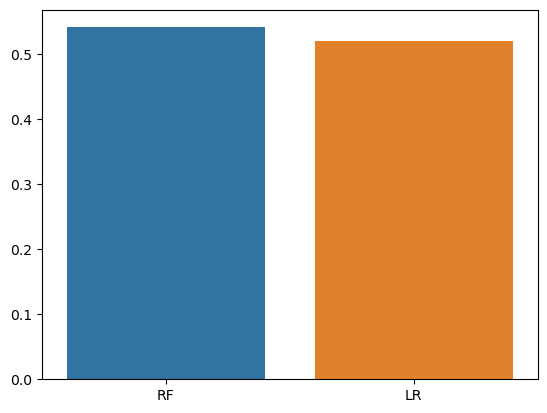

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
import seaborn as sns

x=dfKlasifikacija.drop(["Wins","Losses","Survived"], axis=1)
y=dfKlasifikacija["Survived"]

fold=StratifiedKFold(n_splits=6)
rf=RandomForestClassifier()
lr=LogisticRegression()
rf_param={"n_estimators":[5,10],
          "criterion":["gini","entropy"]}
lr_param={"penalty":["l2",None]}
rid_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_param,cv=fold,scoring="accuracy", n_iter=5)
rid_lr=RandomizedSearchCV(LogisticRegression(),param_distributions=lr_param,cv=fold,scoring="accuracy",n_iter=5)

rid_rf.fit(x,y)
rid_lr.fit(x,y)

print(rid_lr.best_score_)
print(rid_rf.best_score_)

imena=["RF","LR"]
score=[rid_lr.best_score_,rid_rf.best_score_]
sns.barplot(x=imena,y=score)

Naloga 7 (10 T)
Za konec naredite še gručenje nad enakim datasetom, kot ste ga uporabili za regresijo. Podatke transformirajte s pomočjo FastICA dekompozicije. Kot algoritem gručenja uporabite KMeans.
Da boste vedeli koliko je najbolj optimalno število gruč na katere je smiselno deliti podatke pred gručenjem izrišite graf z izračunanimi inerciami za od 1 do (vključno) 8 gruč, nad transformiranimi podatki. Po pravilu komolca iz grafa preberite najbolj optimalno število gruč in ga uporabite v algoritmu.
Izrišite graf, v katerem prikažete transformirane podatke, ki so obarvani glede na gručo, v katero so razvrščeni.

c:\Users\jasar\ANACONDA3\Lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


{1: 18.000570912866092, 2: 18.000570912866092, 3: 18.000570912866092, 4: 18.000570912866092, 5: 18.000570912866092, 6: 18.000570912866092, 7: 18.000570912866092, 8: 18.000570912866092}


<Axes: >

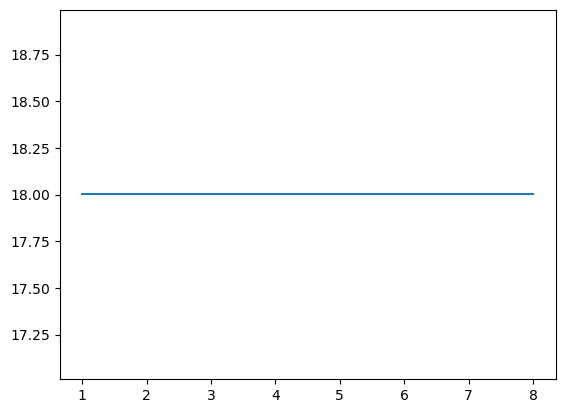

In [92]:
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

v_in={}
ica=FastICA()
df_ica=ica.fit_transform(dfRegresija)
for i in range(1,9):
    kmeans=KMeans(n_clusters=1,random_state=0,n_init="auto").fit(df_ica)
    v_in[i]=kmeans.inertia_
print(v_in)
km2=KMeans(n_clusters=2,random_state=0,n_init="auto").fit(df_ica)
sns.lineplot(x=v_in.keys(),y=v_in.values())


<Axes: >

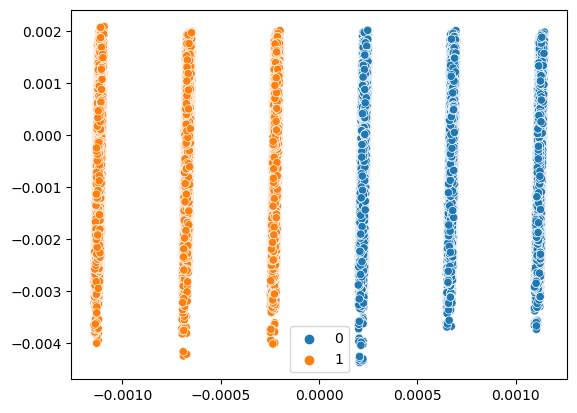

In [91]:
sns.scatterplot(x=df_ica[:,0],y=df_ica[:,1],hue=km2.labels_)